# Project: Investigate a Dataset (Exploring Male vs Female BMI in terms of Obesity level and in relation to Food Supply)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Dataset:
1. Male average BMI per country per year.
2. Female average BMI per country per year.
3. Food Supply per Person data: The total supply of food available in a country measured in kilocalories, divided by the population and 365 (the number of days in the year). The required intake per day varies normally in the range of 1500-3000 kilocalories per day.
4. Geographical region category by Country: File name "CLASS", it contain the mapping of region per country based on World Bank.  The purpose of grouping is to generalize my table/graph for easier to comprehend the world view.

Period of Interest: 1998 - 2007 (10 years).   Note: Food Supply data only available until 2007

I plan to explore the relationship with body BMI and Food supply in each country. Assuming working for a health organization or pharmaceutical company intending to find the country (and region) that are most susceptible to obesity problem, thus to target those countries (or regions) for more education/regulation or investment in order to help more people in need or for better investment ROI.

I will explore the data to identify the top and bottom countries and regions of average BMI.

I want to explore which country most susceptible to food supply to increase or decrease its average BMI, so I will calculate the correlation between food supply versus BMI, and identify the top and bottom countries. By identifying those countries, we may study further to look into the reason for the higher correlation, and lower correltion. It could be the diet habit, exercise level, or environmental reason etc., and can give us idea to target our solution to specific problem contributing to obesity. And to learn from countries that demonstrate better control in BMI. My analysis will not go into finding the causes or explain the BMI trend, and the correlation doesn't mean the causation. The purpose of this analysis is for initial exploration and learning the process.

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import os
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# set your working directory and filename below:  
DIR = "C:\\Users\\stlin\\Dropbox\\Project 3 Investigate Data"

os.chdir(DIR)
print('Your current working directory: \n', os.getcwd())
print('\nContents in your curent working directory: \n', os.listdir("."))


Your current working directory: 
 C:\Users\stlin\Dropbox\Project 3 Investigate Data

Contents in your curent working directory: 
 ['Backup', 'CLASS.xlsx', 'indicator food_consumption.xlsx', 'Indicator_BMI female ASM.xlsx', 'Indicator_BMI male ASM.xlsx']


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [30]:

df_male_bmi = pd.read_excel("Indicator_BMI male ASM.xlsx",sheetname="Data")
df_female_bmi = pd.read_excel("Indicator_BMI female ASM.xlsx",sheetname="Data")
df_food = pd.read_excel("indicator food_consumption.xlsx", sheetname = "Data (Original)")
df_class = pd.read_excel("CLASS.xlsx",sheetname="List of economies")

# Quick look at original data, to see if Index and Colmun aligned and values missing.
# define a function for the info interested to me
def quickview(df, name):
    print("\n",name,"// ","Total count (Row, Column)=>", df.shape, df.shape[0]*df.shape[1],"// NaN count=>",df.isnull().sum().sum(),
          "\n",df.head())

quickview(df_male_bmi,'Original Male BMI')  # Find that BMI table are missing index, but no NaN
quickview(df_female_bmi,'Original Female BMI') # Find that BMI table are missing index, but no NaN
quickview(df_food,'Original Food Supply') # Find that Food table are missing index name, and have large number of NaN, latest Year 2007
quickview(df_class,'Original Region Class') # Find that the table is not organized for my later Join, more effort required to clean it


 Original Male BMI //  Total count (Row, Column)=> (199, 30) 5970 // NaN count=> 0 
        Country      1980      1981      1982      1983      1984      1985  \
0  Afghanistan  21.48678  21.46552  21.45145  21.43822  21.42734  21.41222   
1      Albania  25.22533  25.23981  25.25636  25.27176  25.27901  25.28669   
2      Algeria  22.25703  22.34745  22.43647  22.52105  22.60633  22.69501   
3      Andorra  25.66652  25.70868  25.74681  25.78250  25.81874  25.85236   
4       Angola  20.94876  20.94371  20.93754  20.93187  20.93569  20.94857   

       1986      1987      1988    ...         1999      2000      2001  \
0  21.40132  21.37679  21.34018    ...     20.75469  20.69521  20.62643   
1  25.29451  25.30217  25.30450    ...     25.46555  25.55835  25.66701   
2  22.76979  22.84096  22.90644    ...     23.69486  23.77659  23.86256   
3  25.89089  25.93414  25.98477    ...     26.75078  26.83179  26.92373   
4  20.96030  20.98025  21.01375    ...     21.31954  21.37480  21.4366

### Data Cleaning 
> Here I plan to exclude unhelpful columns/rows so I can focus my analysis to my period of interest. And to organize the dataframe for easiness of later analysis.

In [31]:
# Organize the dataframe for easier analysis
df_male_bmi = df_male_bmi.set_index("Country")
df_female_bmi = df_female_bmi.set_index("Country")
df_food.index.name = "Country"

cols = [c for c in range(1998,2008)] # Period of interest is from 1998 - 2007 (10 years)
df_female_bmi = df_female_bmi[cols]
df_male_bmi = df_male_bmi[cols]
df_food = df_food[cols].dropna()  # drop the NaN rows as I am interesetd to analyze only the country with complete 10 years data
quickview(df_food, 'New Food Supply')

# Check if Index (country) co-exist in each dataframe
df_join_bmi = df_male_bmi.join(df_female_bmi,how='outer',lsuffix='M',rsuffix='F').join(df_food,how='outer')

print("\nCheck NaN in Female BMI, number of occurance =>",df_join_bmi['2007F'].isnull().sum(),"\n",df_join_bmi[df_join_bmi['2007F'].isnull()].index)
print("\nCheck NaN in Male BMI, number of occurance =>",df_join_bmi['2007M'].isnull().sum(),"\n",df_join_bmi[df_join_bmi['2007M'].isnull()].index)
print("\nCheck NaN in Food Supply, number of occurance =>",df_join_bmi[2007].isnull().sum(),"\n",df_join_bmi[df_join_bmi[2007].isnull()].index)

# Finding is there are 27 countries don't have co-existed data on all dataframe (1 NaN row in BMI data, 26 NaN row in Food Supply data)
# For the time being I exclude these countries from my later analysis.

df_join_bmi = df_join_bmi.dropna()  # Note: I will keep this dataframe for later analysis
quickview(df_join_bmi,"Join BMI and Food Supply")


# Now to reshape the region class file for later use, I need only the Region column and the Country (ie. Economy column)
df_class.dropna(subset=[df_class.columns[2]],inplace=True)  # remove blank rows
df_class.columns = df_class.iloc[0]  # Rename the columns header
df_class= df_class.iloc[2:] # drop the first 2 rows
df_class = df_class.set_index('Economy')
df_class = df_class[['Region','Income group']].dropna()
quickview(df_class, 'New Region Class')



 New Food Supply //  Total count (Row, Column)=> (174, 10) 1740 // NaN count=> 0 
                         1998     1999     2000     2001     2002     2003  \
Country                                                                     
Albania              2790.70  2891.76  2832.07  2861.18  2864.93  2838.24   
Algeria              2904.07  2957.91  2928.84  3003.63  3034.33  3073.26   
Angola               1700.90  1757.79  1763.08  1784.16  1833.90  1857.80   
Antigua and Barbuda  2182.80  2200.01  2178.78  2077.87  2073.33  2077.55   
Argentina            3166.62  3266.75  3271.70  3183.34  2965.90  3059.74   

                        2004     2005     2006     2007  
Country                                                  
Albania              2849.36  2917.08  2914.95  2879.57  
Algeria              3090.13  3059.24  3101.20  3153.38  
Angola               1893.70  1915.70  1958.96  1973.29  
Antigua and Barbuda  2161.48  2294.69  2293.67  2368.50  
Argentina            3029.91

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1

Is obesity really become a health problem that are common enough to worth our effort and investment to control it ?
1. Average BMI by Region Y/Y Trend.
2. Translate to World Health Organization's Obesity Standard, and trend by year.

              F          M
2007  25.822991  24.992627
2006  25.722934  24.890399
2005  25.623414  24.792133
2004  25.524670  24.698525
2003  25.426468  24.608454
2002  25.330914  24.524137
2001  25.235746  24.443058
2000  25.141257  24.364220
1999  25.047757  24.286431
1998  24.956581  24.211572
                  F              M
2007     overweight  normal weight
2006     overweight  normal weight
2005     overweight  normal weight
2004     overweight  normal weight
2003     overweight  normal weight
2002     overweight  normal weight
2001     overweight  normal weight
2000     overweight  normal weight
1999     overweight  normal weight
1998  normal weight  normal weight


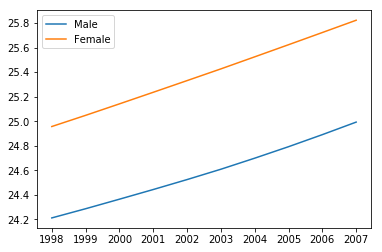

In [32]:
# World average BMI year over year trend

plt.plot(df_male_bmi.columns, df_male_bmi.mean(), label = 'Male')
plt.plot(df_female_bmi.columns, df_female_bmi.mean(),label='Female')
plt.xticks(cols)
plt.legend()

df_bmi_year = pd.DataFrame({'M':df_male_bmi.mean(), 'F':df_female_bmi.mean()}).sort_index(ascending=False)
print(df_bmi_year)

# We can see clearly the BMI is increasing consistently Year over Year, and Female has higher average than Male.
# But I want to find a way to understand how good or how bad the BMI figure is, so I will add in the classification of BMI in terms of obesity level

# BMI with World Health Organization Standard:
def bmi_class(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi < 25:
        return "normal weight"
    elif bmi < 30:
        return "overweight"
    elif bmi < 35:
        return "class I obesity"
    elif bmi < 40:
        return "class II obesity"
    else:
        return "class III obesity"
    
print(df_bmi_year.applymap(bmi_class))


,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
normal weight,87,83,82,81,81,78,74,73,72,70
overweight,107,110,110,110,108,111,115,115,115,116
class I obesity,5,6,7,8,10,10,10,11,12,13


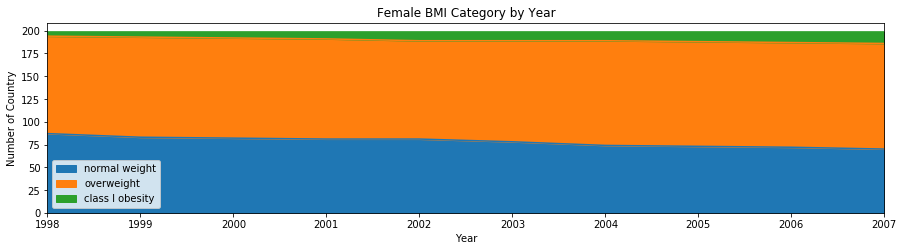

In [33]:
# I like to quantify the trend of number of countries in each BMI category by visualize in Stacked Area Chart to quantify the issue
# Female
df_female_bmi_class = df_female_bmi.applymap(bmi_class)

df_bmi_female_count = df_female_bmi_class.apply(pd.value_counts) # to count the number of occurance for each data in string format, so I can later create Area chart
df_bmi_female_count_select = df_bmi_female_count.loc[['normal weight','overweight','class I obesity']]  # To reorder the column for better visualization later
df_bmi_female_count_select_tran = df_bmi_female_count_select.transpose() # transpose so I can use simple .plot.area method for area chart visualization
df_bmi_female_count_select_tran.plot.area(xticks=cols, figsize=(15,3.5))  #female bmi also shows the same trend world-wide
plt.title('Female BMI Category by Year')
plt.xlabel('Year')
plt.ylabel('Number of Country')
df_bmi_female_count_select

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
normal weight,114,111,110,108,106,104,99,93,93,86
overweight,83,86,87,89,90,92,96,102,101,107
class I obesity,2,2,2,2,3,3,4,4,5,6


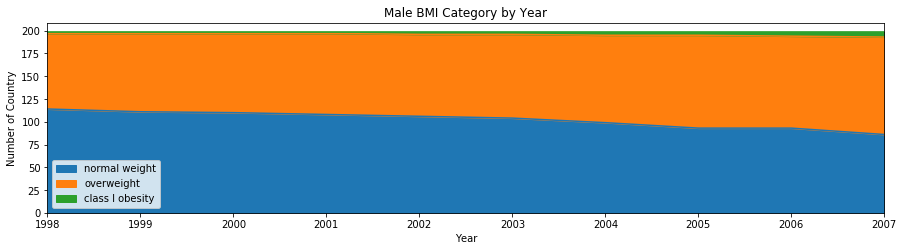

In [34]:
# I like to quantify the trend of number of countries in each BMI category by visualize in Stacked Area Chart to quantify the issue
# Male
df_male_bmi_class = df_male_bmi.applymap(bmi_class)

df_bmi_male_count = df_male_bmi_class.apply(pd.value_counts) # to count the number of occurance for each data in string format, so I can later create Area chart
df_bmi_male_count_select = df_bmi_male_count.loc[['normal weight','overweight','class I obesity']]  # To reorder the column for better visualization later
df_bmi_male_count_select_tran = df_bmi_male_count_select.transpose() # transpose so I can use simple .plot.area method for area chart visualization
df_bmi_male_count_select_tran.plot.area(xticks=cols, figsize=(15,3.5))  #male bmi also shows the same trend world-wide
plt.title('Male BMI Category by Year')
plt.xlabel('Year')
plt.ylabel('Number of Country')
df_bmi_male_count_select

### Above finding:
1. Both male and female's BMI world-wide average have increaes consistently year over year
2. Female show higher average BMI than male in all years.
3. By World Health Organization's standard, female average BMI turned "overweight" starting 1999 onward, and Male is about to turn "overweight" starting 2008.
4. More countries are turning to Overweight and Obesity year over year for both Male and Female (by country average BMI).

Conclusion: Overweight and obesity has become more common year over year. It signals a potential threat worth our time to look into.

### Next:
I will like to narrow down my analysis to region and country level, so that we may reveal region specific problem and trend.  I will group the countries to 7 different regions accroding to World Bank's category.


### Research Question 2

Which region and countries do we see the most severe obesity problem ?  We can then focus our effort to provide solutions for these countries.
1. Find region with the highest average BMI.
2. Within the top region, find top 2 countreis of highest obesity level. This can be our target countries to help control its BMI level, and we can study further on what is the reason contributing to the BMI. 
3. Within the top region, find bottom 2 conutries of lowest BMI level in the same region and same income group to study as comparison later.

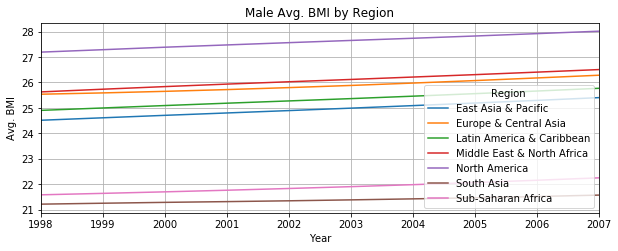

In [35]:
# To add in region grouping to the BMI table
# This cell for Male BMI by Region

df_male_bmi_region = df_male_bmi.join(df_class[['Region','Income group']], how = 'inner')
df_male_bmi_region_group = df_male_bmi_region.groupby('Region')
graph = df_male_bmi_region_group.mean().transpose()
graph.index.name = 'Year'

graph.plot(figsize=(10, 3.5),grid=True,title = 'Male Avg. BMI by Region')

plt.ylabel('Avg. BMI')


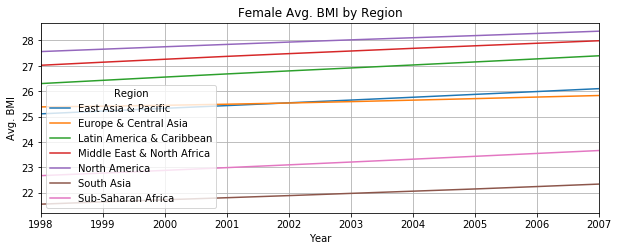

In [36]:
# This cell for Female BMI by Region
df_female_bmi_region = df_female_bmi.join(df_class[['Region','Income group']], how = 'inner')
df_female_bmi_region_group = df_female_bmi_region.groupby('Region')
graph = df_female_bmi_region_group.mean().transpose()
graph.index.name = 'Year'
graph.plot(figsize=(10, 3.5),grid=True,title = 'Female Avg. BMI by Region')
plt.ylabel('Avg. BMI')

### Above finding:
For both male and female, the region "North America" has the highest BMI in all years, followed by "Middle East & North Africa".

### Next:
Within the top 2 region, what are their top 2 countries with highest BMI ?
And what are the bottom 2 countries within the same region and same income group ? This may serve a comparison purpose for future study.


In [37]:
# Highest BMI region is North America, but upon my initial print, it shows that North America only have 3 countries, so I can just use .head() to list all, no need for additional filter
# This cell for Male in North America

df_male_bmi_region['10 Years Average BMI'] = df_male_bmi_region.mean(axis=1) # Add the 10 years average column to dataframe for Ranking purpose
df_female_bmi_region['10 Years Average BMI'] = df_female_bmi_region.mean(axis=1)
df_male_bmi_region.sort_values(by=2007,ascending=False,inplace=True) # sort by 2007 column for ranking
df_male_bmi_region[df_male_bmi_region['Region']=='North America']

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Region,Income group,10 Years Average BMI
United States,27.49846,27.60386,27.71039,27.80569,27.90479,28.00041,28.10039,28.19703,28.28959,28.37574,North America,High income,27.948635
Bermuda,27.24352,27.34456,27.45476,27.55826,27.66492,27.76999,27.87082,27.98684,28.12057,28.26753,North America,High income,27.728177
Canada,26.83631,26.91646,26.99336,27.06234,27.12542,27.18538,27.24205,27.29581,27.35018,27.40416,North America,High income,27.141147


In [38]:
# This cell for Female in North America
df_female_bmi_region.sort_values(by=2007,ascending=False,inplace=True) # sort by 2007 column for ranking
df_female_bmi_region[df_female_bmi_region['Region']=='North America']

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Region,Income group,10 Years Average BMI
Bermuda,29.50316,29.55130,29.61135,29.68104,29.75882,29.83267,29.90034,29.98439,30.08569,30.19904,North America,High income,29.81078
United States,27.27785,27.40374,27.52943,27.64247,27.75614,27.86337,27.97255,28.07372,28.16881,28.25992,North America,High income,27.79480
Canada,25.91079,26.01716,26.11965,26.21450,26.29888,26.37950,26.45484,26.51921,26.58187,26.64210,North America,High income,26.31385


### Above finding:
1. North America only have 3 countries, and all of them are High Income group. For male, the United States have the highest BMI in both 2007 and 10 Years Average.  For female, Bermuda has the highest BMI in both 2007 and 10 Years Average. 
2. Canada has the lowest BMI in both male and female in North America.

### Next:
Let's look at the 2nd highest region "Middle East & North Africa"

In [39]:
# This cell to investigate "Male" top and bottom 2 Countries in Middle East.

# To create a function for quick check on Ranking in each region.

def topRank(df,columnfilter='Region',filterby='North America', columnrank=2007, topN=2,optionalnote=''):
    df_filter = df[df.loc[:,columnfilter]==filterby] # eg. to filter the region by North America
    df_filter = df_filter.sort_values(by=[columnrank],ascending=False)
    print('\n',optionalnote,'The top',topN,'countries from',filterby,'\n')
    print(df_filter[0:topN])

def bottomRank(df,columnfilter='Region',filterby='North America', columnrank=2007, bottomN=2,optionalnote=''):
    df_filter = df[df.loc[:,columnfilter]==filterby] # eg. to filter the region by North America
    df_filter = df_filter.sort_values(by=[columnrank],ascending=True)
    print('\n',optionalnote,'The bottom',bottomN,'countries from',filterby,'\n')
    print(df_filter[0:bottomN])
    
    
topRank(df_male_bmi_region,'Region','Middle East & North Africa',2007,2,'Sort by 2007 BMI level:')

# All top 2 countries are within the High Income group, so let's check the bottom 2 countries within the High Income group for comparison.

df_male_bmi_HighInc = df_male_bmi_region[df_male_bmi_region['Income group']=='High income']

bottomRank(df_male_bmi_HighInc,'Region','Middle East & North Africa',2007,2,'Sort by 2007 BMI level in High income group:')



 Sort by 2007 BMI level: The top 2 countries from Middle East & North Africa 

            1998      1999      2000      2001      2002      2003      2004  \
Kuwait  27.73497  27.88174  28.03291  28.16929  28.26425  28.38786  28.52341   
Qatar   26.69291  26.84067  26.98686  27.12452  27.26179  27.40511  27.55011   

            2005      2006      2007                      Region Income group  \
Kuwait  28.67629  28.83975  29.00300  Middle East & North Africa  High income   
Qatar   27.69226  27.83362  27.98678  Middle East & North Africa  High income   

        10 Years Average BMI  
Kuwait             28.351347  
Qatar              27.337463  

 Sort by 2007 BMI level in High income group: The bottom 2 countries from Middle East & North Africa 

            1998      1999     2000      2001      2002      2003      2004  \
Oman    25.15218  25.26009  25.3688  25.48419  25.58856  25.68600  25.78828   
Israel  26.04805  26.15018  26.2625  26.37810  26.49152  26.59689  26.70230   



In [40]:
# This cell to investigate "Female" top and bottom 2 Countries in Middle East.

topRank(df_female_bmi_region,'Region','Middle East & North Africa',2007,2,'Sort by 2007 BMI level:')


# The highest country is High income, and the second highest country is Lower middle income.
# Within Middle East, I'd like to find out the bottom 2 countries in "High income" and "Lower middle income", respectively

df_female_bmi_HighInc = df_female_bmi_region[df_female_bmi_region['Income group']=='High income']
df_female_bmi_LMInc = df_female_bmi_region[df_female_bmi_region['Income group']=='Lower middle income']

bottomRank(df_female_bmi_HighInc,'Region','Middle East & North Africa',2007,2,'Sort by 2007 BMI level in High income group:')
bottomRank(df_female_bmi_LMInc,'Region','Middle East & North Africa',2007,2,'Sort by 2007 BMI level in Lower middle income group:')



 Sort by 2007 BMI level: The top 2 countries from Middle East & North Africa 

            1998      1999      2000      2001      2002      2003      2004  \
Kuwait  29.86438  30.00081  30.14044  30.25933  30.34041  30.45279  30.57360   
Egypt   28.46474  28.65712  28.84879  29.03225  29.20828  29.37144  29.52119   

            2005      2006      2007                      Region  \
Kuwait  30.71712  30.86545  31.01442  Middle East & North Africa   
Egypt   29.66619  29.80682  29.95573  Middle East & North Africa   

               Income group  10 Years Average BMI  
Kuwait          High income             30.422875  
Egypt   Lower middle income             29.253255  

 Sort by 2007 BMI level in High income group: The bottom 2 countries from Middle East & North Africa 

           1998      1999      2000      2001      2002      2003      2004  \
Oman   26.23057  26.26647  26.31132  26.36844  26.41259  26.44791  26.48730   
Malta  26.66763  26.74443  26.79928  26.84629  26.88186 

### Above finding:
In Middle East & North Africa:
- Male highest 2 BMI in 2007: 1. Kuwait (high income), 2. Qatar (high income)
- Male bottom 2 BMI in 2007: 1. Oman (high income), 2. Israel (high income)

- Female highest 2 BMI in 2007: 1. Kuwait (high income), 2. Egypt (lower middle income)
- Female bottom 2 BMI in 2007 within high income countries: 1. Oman (high income), 2. Malta (high income)
- Female bottom 2 BMI in 2007 within lower middle income countries: 1. Djibouti (lower middle income), 2. Yemen (lower middle income)

Therefore, we may prioritize our effort and investment to control the obesity growth in high BMI countries, and can spend time to research why other countries don't have as high BMI, especially the lowest BMI countries.

### Next:
I would like to explore the factors that show correlation with BMI in the next research question.

### Research Question 3
To explore relationship between BMI and other factor, ie. Food Supply. Although correlation doesn't prove causation, but this can give me some direction where to further the study of possible reasons contributing to obesity:
- Food Supply: To see if there is correlation between food supply and BMI. What are countries have highest and loweset correlation between BMI and food supply ?
- Gender: I would like to see how Male and Female's BMI different from each other.
Is male's BMI shows higher correlation to food supply or female BMI shows higher ? 
And to compute correlation between Male and Female BMI.

In [41]:
# This cell to look into Male's Avg BMI correlation with Food Supply per Person.

# I prefer to create another copy for me to add in additional calculated rows/columns for analysis, so do not mess up the original dataframe
df_male_bmi_stat = df_male_bmi.copy()
df_female_bmi_stat = df_female_bmi.copy()
df_food_stat = df_food.copy()

df_male_bmi_stat.loc['Yearly Average'] = df_male_bmi.mean(axis=0)  # To add the yearly average for later comparison
df_food_stat.loc['Yearly Average'] = df_food.mean(axis=0) 

df_male_bmi_corr_food = df_male_bmi_stat.corrwith(df_food_stat , axis=1, drop=True) # axis=1 to show correlation of each Country (Index label), axis=0 to show correlation of each Year (column label)
print('\nMale top 5 correlation between Male BMI and Food Supply:\n',df_male_bmi_corr_food.sort_values(ascending=False)[:5]) # Sort by correlation, and show top 5, interestingly the Yearly Average become the Top 1.  
print('\nMale bottom 5 correlation between Male BMI and Food Supply:\n',df_male_bmi_corr_food.sort_values(ascending=False)[-5:]) #Also, Japan has highly-negative correlation, interesting to look into.

print('\nNumber of positive correlation=>',df_male_bmi_corr_food[df_male_bmi_corr_food>0].count())
print('\nNumber of negative correlation=>',df_male_bmi_corr_food[df_male_bmi_corr_food<0].count())

print('\nAverage Correlation between Male BMI and Food Supply\n',df_male_bmi_corr_food.mean())


Male top 5 correlation between Male BMI and Food Supply:
 Country
Yearly Average    0.998704
Ghana             0.995741
Vietnam           0.994836
Mali              0.989840
Myanmar           0.988548
dtype: float64

Male bottom 5 correlation between Male BMI and Food Supply:
 Country
Bulgaria    -0.711948
Ireland     -0.742458
Argentina   -0.779500
Spain       -0.826352
Japan       -0.909878
dtype: float64

Number of positive correlation=> 144

Number of negative correlation=> 30

Average Correlation between Male BMI and Food Supply
 0.5500011158682836


In [42]:
# This cell to look into Female's Avg BMI correlation with Food Supply per Person.
df_female_bmi_stat.loc['Yearly Average'] = df_male_bmi.mean(axis=0) # To add the yearly average for later comparison
df_female_bmi_corr_food = df_female_bmi_stat.corrwith(df_food_stat , axis=1, drop=True) # axis=1 to show correlation of each Country (Index label), axis=0 to show correlation of each Year (column label)
print('\nfemale top 5 correlation between female BMI and Food Supply:\n',df_female_bmi_corr_food.sort_values(ascending=False)[:5]) # Sort by correlation, and show top 5, interestingly the Yearly Average become the Top 1.  
print('\nfemale bottom 5 correlation between female BMI and Food Supply:\n',df_female_bmi_corr_food.sort_values(ascending=False)[-5:]) #Also, Japan has highly-negative correlation, interesting to look into.

print('\nNumber of positive correlation=>',df_female_bmi_corr_food[df_female_bmi_corr_food>0].count())
print('\nNumber of negative correlation=>',df_female_bmi_corr_food[df_female_bmi_corr_food<0].count())
print('\nAverage Correlation between Female BMI and Food Supply\n',df_female_bmi_corr_food.mean())


female top 5 correlation between female BMI and Food Supply:
 Country
Yearly Average    0.998704
Vietnam           0.994200
Myanmar           0.993627
Angola            0.992889
Ghana             0.992733
dtype: float64

female bottom 5 correlation between female BMI and Food Supply:
 Country
Ireland     -0.718330
Haiti       -0.718775
Argentina   -0.789738
Spain       -0.801529
Zimbabwe    -0.875703
dtype: float64

Number of positive correlation=> 143

Number of negative correlation=> 31

Average Correlation between Female BMI and Food Supply
 0.5438788492509115


### Above finding:
- Both male and female Average BMI has shown positive correlation with Food Supply. (80% countries are positive correlation, only 20% countries are negative correlation)
- Interesting that yearly average shows highest positive correlation for both male and female
- Ghana and Vietnam are within top 5 correlation for both male and female.  I am interested to look into why Japan, Zimbabwe and Spain had shown such negative correlation. 


### Next:
Although it seems to show positive correlation in most of the countries, I would like to visualize the relationship between Avg. BMI and Food Supply, so that I can get a better sense.

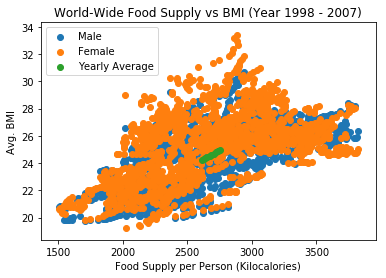

In [43]:

df_join_bmi.head() # we create this joined dataframe back in Data Cleaning section combining Male BMI + Female BMI + Food Supply
# Utilize this joined view to create scatter chart to visualize relationship between Avg BMI and Food Supply per Person for all countries and all years

df_join_bmi.rename(columns=str,inplace=True) # To convert all column to be string type for easier index slicing to generate scatter plot

plt.scatter(df_join_bmi.loc[:,'1998':'2007'],df_join_bmi.loc[:,'1998M':'2007M'],label='Male')  # X-axis is Food Supply, Y-axis is Male BMI
plt.scatter(df_join_bmi.loc[:,'1998':'2007'],df_join_bmi.loc[:,'1998F':'2007F'],label='Female')  # X-axis is Food Supply, Y-axis is Feale BMI
plt.scatter(df_food_stat.loc['Yearly Average'],df_male_bmi_stat.loc['Yearly Average'],label='Yearly Average')
plt.title('World-Wide Food Supply vs BMI (Year 1998 - 2007)')
plt.xlabel('Food Supply per Person (Kilocalories)')
plt.ylabel('Avg. BMI')
plt.legend()
plt.show()


### Above finding:
By visualization, I can see generally positive correlation between Food Supply per Person and Avg BMI although the range varies widely.  The Yearly Average's correlation located in the middle (green point) and show almost a straight line signaling very high correlation. 

### Next:
Next I would like to explore on the difference between genders.

In [44]:
df_male_female_diff = df_female_bmi - df_male_bmi
df_male_female_diff_stat = df_male_female_diff.copy()
df_male_female_diff_stat.loc['Yearly Average'] = df_male_female_diff.mean(axis=0)
df_male_female_diff_stat['Country Average'] = df_male_female_diff_stat.mean(axis=1)
print('\nTop 5 country Female having higher BMI than Male:\n', df_male_female_diff_stat['Country Average'].sort_values(ascending=False)[0:5])
print('\nTop 5 country Male having higher BMI than Female:\n',df_male_female_diff_stat['Country Average'].sort_values(ascending=True)[0:5])

print('\nOn average Female Avg. BMI are higher than Male Avg. BMI by:\n',df_male_female_diff_stat.mean().mean())

# print("\nCorrelation of each country's male versus female's BMI level   df_male_bmi.corrwith(df_female_bmi,axis=0).mean()) # axis=0: This correlation shows how similar of Male versus Female BMI's relative level between Countries in respective Year
print("\nCorrelation of how closely related between Male and Female BMI across time (year over year) \
from all countries average:\n", df_male_bmi.corrwith(df_female_bmi,axis=1).mean()) # axis=1: This correlation shows how similar of Male versus Female BMI's relative level between Years in respective Country 

# 0.92 correlation signal pretty high correlation between male and female's BMI.
print('\nTop 5 correlation country:\n',df_male_bmi.corrwith(df_female_bmi,axis=1).sort_values(ascending=False)[:5])
print('\nBottom 5 correlation country:\n',df_male_bmi.corrwith(df_female_bmi,axis=1).sort_values(ascending=True)[:5])


Top 5 country Female having higher BMI than Male:
 Country
Swaziland       5.247790
Lesotho         5.064981
Botswana        4.164352
Dominica        3.925160
South Africa    3.375375
Name: Country Average, dtype: float64

Top 5 country Male having higher BMI than Female:
 Country
Switzerland   -1.879149
Italy         -1.331658
Cyprus        -1.315570
Japan         -1.300879
Croatia       -1.259635
Name: Country Average, dtype: float64

On average Female Avg. BMI are higher than Male Avg. BMI by:
 0.8021174673366835

Correlation of how closely related between Male and Female BMI across time (year over year) from all countries average:
 0.9231601324214439

Top 5 correlation country:
 Country
Nauru               0.999992
Marshall Islands    0.999985
Palau               0.999980
Kuwait              0.999963
Tonga               0.999960
dtype: float64

Bottom 5 correlation country:
 Country
Singapore          -0.935762
Zimbabwe           -0.837368
Brunei             -0.744189
Congo, Dem. 

### Above finding:
On average, female BMI are 0.8 higher than male BMI world-wide. This difference is quite consistent in all years (refer to the line chart created in Research Question 1), and the correlation between Male and Female BMI across years is 0.92, highly positively correlated, which make sense.  The ranking showing some countries have significantly high difference between male and female, could be interesting to look into.

### Next:
I would like to visualize the relationship between Male and Female BMI using scatter chart. This may give me better sense of the world distribution.

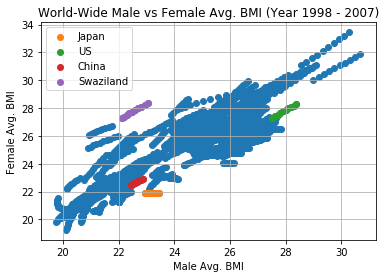

In [45]:
# I'd like to visualize the relationship between Male and Female BMI using scatter chart.

plt.scatter(df_join_bmi.loc[:,'1998M':'2007M'],df_join_bmi.loc[:,'1998F':'2007F']) # X-axis is Male BMI, Y-axis is Female BMI
plt.scatter(df_join_bmi.loc['Japan','1998M':'2007M'],df_join_bmi.loc['Japan','1998F':'2007F'],label='Japan')   # Visualize how Japan show in comparison to the world others
plt.scatter(df_join_bmi.loc['United States','1998M':'2007M'],df_join_bmi.loc['United States','1998F':'2007F'],label='US')   # Visualize how the US show in comparison to the world others
plt.scatter(df_join_bmi.loc['China','1998M':'2007M'],df_join_bmi.loc['China','1998F':'2007F'],label='China')   # Visualize how the China show in comparison to the world others
plt.scatter(df_join_bmi.loc['Swaziland','1998M':'2007M'],df_join_bmi.loc['Swaziland','1998F':'2007F'],label='Swaziland')   # Visualize how the Swaziland show in comparison to the world others
plt.grid()
plt.legend()
plt.title('World-Wide Male vs Female Avg. BMI (Year 1998 - 2007)')
plt.xlabel('Male Avg. BMI')
plt.ylabel('Female Avg. BMI')


### Above finding:
In visualization, I see generally consistent positive correlation between male and female BMI. Out of curiosity, I have specifically pick several countries to visualize on the scatter chart to show its figure in relation to the other countries in the world. Japan is again an interesting one to look at since it seems one of the extreme case that shows negative correlation between Male and Female, having Female BMI lower than Male BMI, and both Male and Female BMI are on the lower end of the world. 

<a id='conclusions'></a>
## Conclusions

In this analysis, I have observed the growing BMI in all regions. Using World Health Organization's BMI standard, I have  quantified the number of countries in each category, and have shown there are more and more countries are heading toward the "overweight" and "obesity" each year between 1998 to 2007. The problem seems more wide-spread then I thought.

The region that showing more severe obesity phenomenom is "North America" and "Middel East & North Africa". By listing out the top BMI countries (US and Kuwait) and bottom BMI countries (Canada and Oman) in each region and income group, I have the list of countries may conduct further study what is contributing to different BMI level.

In general, there are positive correlation between BMI and Food Supply. Although correlation doesn't mean causation, I would naturally think the more kalories people consumed, the higher BMI it can reach. However, not all countries show positive correlation, and even among the positive correlation countries, the range of correlation can vary widely, signaling many other factors affecting the BMI, and pending more study to reveal it.

On average, female BMI are around 0.8 higher than male BMI, it is consistent every year in the 10 years period explored (1998 to 2007), and it shows positive correlation 0.92 between Male and Female BMI across years. In the exploration, I have seen several countries outside the norm, one of it is Japan that shows negative correlation between Male and Female, having Female BMI lower than Male BMI, and both Male and Female BMI are on the lower end of the world. It would be interesting to look into these outside the norm cases and may provide some insight to the driver of obesity in future study.

Note: Most of the code are from either Python Documentation and online Stack OverFlow website from people asking similar questions.